<a href="https://colab.research.google.com/github/musleho/housePriceANN/blob/main/keras_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

In [14]:
df = pd.read_csv('sample_data/kc_house_data.csv')

In [15]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<Axes: xlabel='price', ylabel='Count'>

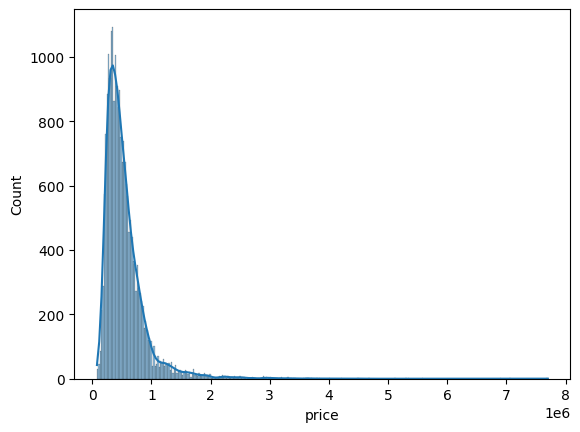

In [17]:
sb.histplot(df['price'], kde=True)

<Axes: xlabel='bedrooms', ylabel='count'>

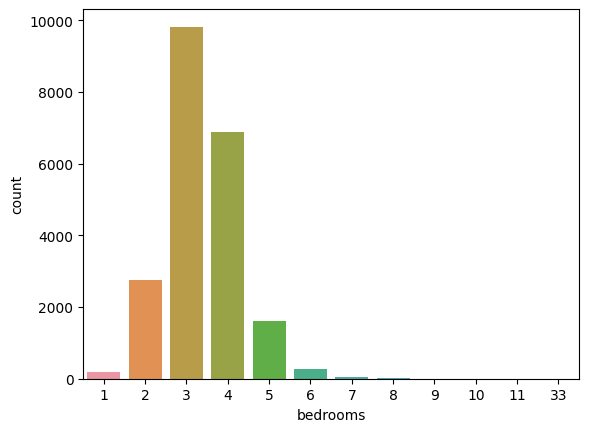

In [18]:
sb.countplot(x=df['bedrooms'])

In [19]:
df.corr(numeric_only=True)['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

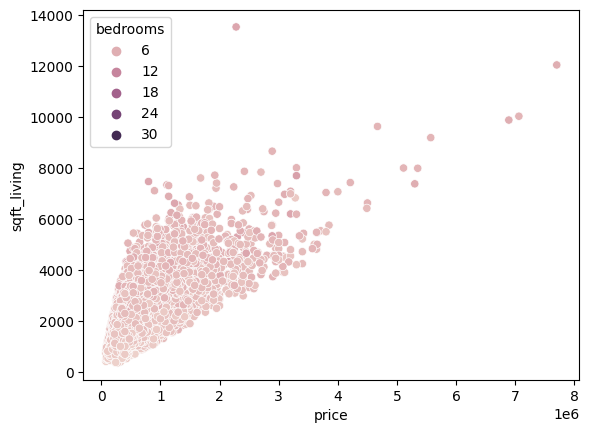

In [20]:
sb.scatterplot(x='price', y='sqft_living', hue='bedrooms', data=df)

In [21]:
new_df = df.iloc[int(len(df)*0.01):]
new_df = new_df.drop('id', axis=1)
new_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21382.0,540643.506080,368029.759965,78000.0000,322500.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21382.0,3.373258,0.927522,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,21382.0,2.116827,0.769430,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,21382.0,2080.868721,918.850051,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21382.0,15112.118698,41528.250377,520.0000,5040.0000,7619.0000,10693.500,1.651359e+06
floors,21382.0,1.494551,0.539910,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,21382.0,0.007576,0.086715,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,21382.0,0.235058,0.767439,0.0000,0.0000,0.0000,0.000,4.000000e+00
condition,21382.0,3.409410,0.650308,1.0000,3.0000,3.0000,4.000,5.000000e+00
grade,21382.0,7.658685,1.174441,3.0000,7.0000,7.0000,8.000,1.300000e+01


In [22]:
new_df['date'] = pd.to_datetime(new_df['date'])
new_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
215,2015-01-15,280000.0,2,1.00,850,16400,1.0,0,0,3,6,850,0,1923,0,98168,47.4889,-122.299,1100,14459
216,2015-02-21,1510000.0,5,3.00,3300,33474,1.0,0,3,3,9,1870,1430,1957,1991,98040,47.5673,-122.210,3836,20953
217,2014-07-03,445838.0,3,2.50,2250,5692,2.0,0,0,3,8,2250,0,2000,0,98146,47.5133,-122.379,1320,5390
218,2014-08-28,1070000.0,2,2.25,3900,14864,1.0,0,3,3,8,1950,1950,1947,0,98144,47.5884,-122.291,2580,5184
219,2014-10-23,467000.0,2,1.50,1320,10800,1.0,0,0,4,8,1320,0,1947,0,98177,47.7145,-122.367,2120,12040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [23]:
new_df['year'] = new_df['date'].apply(lambda date : date.year)
new_df['month'] = new_df['date'].apply(lambda date : date.month)
new_df[['year', 'month']]

,year,month
215,2015,1
216,2015,2
217,2014,7
218,2014,8
219,2014,10
...,...,...
21592,2014,5
21593,2015,2
21594,2014,6
21595,2015,1


(0.0, 600000.0)

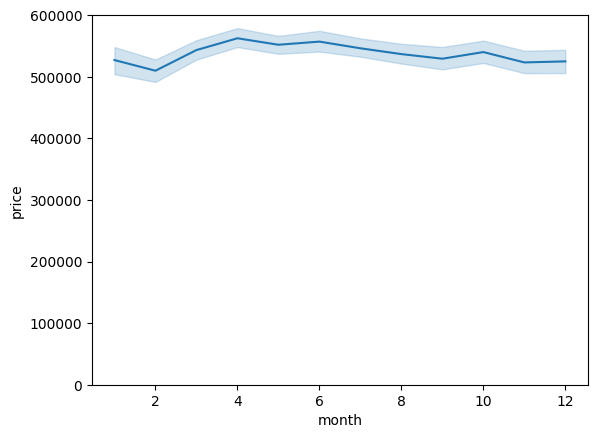

In [24]:
sb.lineplot(x='month', y='price', data=new_df)
plt.ylim(0,600000)

In [25]:
new_df = new_df.drop('date', axis=1)
new_df = new_df[new_df['price'] < new_df['price'].quantile(0.99)]

In [26]:
new_df = new_df.drop('zipcode', axis=1)
new_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [27]:
X = new_df.drop('price', axis=1).values
y = new_df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [29]:
X_test = scaler.transform(X_test)
X.shape

(21167, 19)

In [30]:
model = Sequential()
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [31]:
model.fit(x=X_train, y=y_train, epochs=250, validation_data=(X_test, y_test), batch_size=128)

Epoch 1/250
116/116 [==============================] - 2s 5ms/step - loss: 350274256896.0000 - val_loss: 349955817472.0000
Epoch 2/250
116/116 [==============================] - 0s 3ms/step - loss: 349406789632.0000 - val_loss: 347013447680.0000
Epoch 3/250
116/116 [==============================] - 0s 3ms/step - loss: 337862066176.0000 - val_loss: 320077234176.0000
Epoch 4/250
116/116 [==============================] - 0s 3ms/step - loss: 279399071744.0000 - val_loss: 221222600704.0000
Epoch 5/250
116/116 [==============================] - 0s 3ms/step - loss: 151100686336.0000 - val_loss: 85582389248.0000
Epoch 6/250
116/116 [==============================] - 0s 4ms/step - loss: 64014426112.0000 - val_loss: 53054259200.0000
Epoch 7/250
116/116 [==============================] - 0s 3ms/step - loss: 54421196800.0000 - val_loss: 51962662912.0000
Epoch 8/250
116/116 [==============================] - 0s 3ms/step - loss: 53521117184.0000 - val_loss: 51162980352.0000
Epoch 9/250
116/116 [==

In [32]:
losses = pd.DataFrame(model.history.history)

<Axes: >

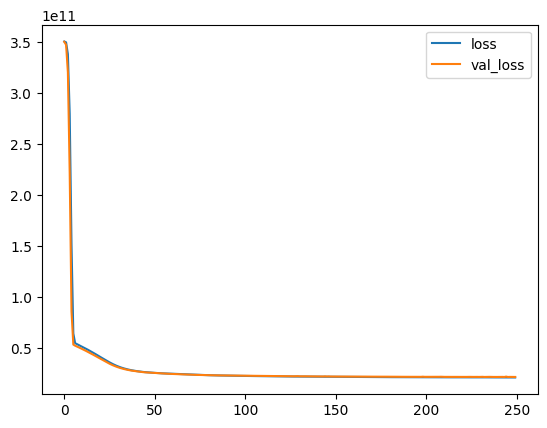

In [33]:
losses.plot()

In [34]:
predictions = model.predict(X_test)

199/199 [==============================] - 0s 1ms/step


In [35]:
mean_squared_error(y_test, predictions)

21301781784.819977

In [36]:
mean_absolute_error(y_test, predictions)

98811.76331975279

In [37]:
explained_variance_score(y_test, predictions)

0.7318685385727925

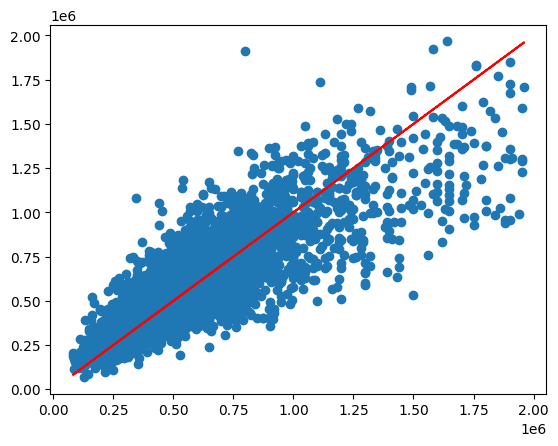

In [38]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [39]:
one_house = new_df.drop('price', axis=1).iloc[0]
new_df.iloc[0]

price            280000.0000
bedrooms              2.0000
bathrooms             1.0000
sqft_living         850.0000
sqft_lot          16400.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 6.0000
sqft_above          850.0000
sqft_basement         0.0000
yr_built           1923.0000
yr_renovated          0.0000
lat                  47.4889
long               -122.2990
sqft_living15      1100.0000
sqft_lot15        14459.0000
year               2015.0000
month                 1.0000
Name: 215, dtype: float64

In [40]:
house = scaler.transform(one_house.values.reshape(-1,19))

In [41]:
model.predict(house)

1/1 [==============================] - 0s 20ms/step


array([[232308.44]], dtype=float32)